#**Trabalhando com Planilhas Excel**


In [8]:
#Importar a biblioteca pandas
import pandas as pd

In [9]:
#Leitura dos arquivos
df1 = pd.read_excel("./Datasets/Aracaju.xlsx")
df2 = pd.read_excel("./Datasets/Fortaleza.xlsx")
df3 = pd.read_excel("./Datasets/Natal.xlsx")
df4 = pd.read_excel("./Datasets/Recife.xlsx")
df5 = pd.read_excel("./Datasets/Salvador.xlsx")

In [10]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [11]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [12]:
#Retorna as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [13]:
#Retorna as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [14]:
#Amostra de dados - retorna um número especificado de linhas aleatórias
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
122,Natal,2019-01-02,13.27,1037,1
49,Salvador,2019-01-01,37.88,1034,2
117,Fortaleza,2019-03-02,15.42,983,8
128,Aracaju,2018-01-01,37.49,1521,2
199,Natal,2019-01-02,153.87,1036,3


In [15]:
#Verifica o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [16]:
#Alterando o tipo de dado da coluna
df['LojaID'] = df['LojaID'].astype('object')

In [17]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**Tratando valores faltantes**

In [19]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [20]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [21]:
df["Vendas"].mean()

122.61180089485458

In [22]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [23]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
120,Fortaleza,2019-03-02,184.90,982,4
14,Aracaju,2018-01-01,148.21,1521,3
129,Natal,2019-01-02,125.66,1037,1
105,Fortaleza,2019-01-01,174.66,1004,1
217,Natal,2019-01-02,37.65,1036,2
163,Natal,2019-01-02,17.66,1036,3
50,Aracaju,2018-01-01,7.52,1522,5
18,Natal,2019-03-14,581.00,853,3
80,Aracaju,2018-01-01,121.77,1523,3
134,Natal,2019-01-02,125.90,1036,1


In [24]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [25]:
#Apagando as linhas com valores nulos 
df.dropna(inplace = True)

In [26]:
#Apagando as linhas com valores nulos com base em apenas 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [27]:
#Removendo linhas que estejam com valores faltantes em todas as colunas 
df.dropna(how="all", inplace = True)

**Criando Colunas Novas**

In [28]:
#Criando coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [29]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [30]:
#Exemplo para achar a quantida com base em vendas e receita
df["Receita/Vendas"] = df["Receita"]/df["Vendas"]

In [31]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [32]:
#Retorna a maior receita
df["Receita"].max()

3544.0

In [33]:
#Retorna a menor receita
df["Receita"].min()

3.34

In [34]:
#Retorna um número especificado de linhas, começando no topo depois de classificar o DataFrame pelo valor mais alto para uma coluna especificada
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [35]:
#Retorna um número especificado de linhas, começando no topo depois de classificar o DataFrame pelo valor mais baixo para uma coluna especificada
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [36]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [37]:
#Ordenando conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# **Trabalhando com Datas**

In [38]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [39]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [40]:
#Transformando a coluna de "Data" em data
df["Data"] = pd.to_datetime(df["Data"])

In [41]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [42]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [43]:
#Criando uma nova coluna por ano
df["Ano_vendas"] = df["Data"].dt.year

In [44]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_vendas
45,Recife,2019-01-01,15.90,983,8,127.20,8.0,2019
100,Salvador,2019-01-01,190.97,1036,2,381.94,2.0,2019
179,Natal,2019-01-02,64.95,1036,1,64.95,1.0,2019
9,Natal,2018-05-02,261.00,852,3,783.00,3.0,2018
106,Salvador,2019-01-01,149.19,1035,2,298.38,2.0,2019


In [45]:
#Extraindo o mês e o dia
df["mes_venda"],df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [46]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_vendas,mes_venda,dia_venda
76,Salvador,2019-01-01,39.51,1035,3,118.53,3.0,2019,1,1
100,Natal,2019-01-02,190.97,1036,2,381.94,2.0,2019,1,2
86,Aracaju,2018-01-01,154.92,1521,5,774.60,5.0,2018,1,1
91,Recife,2019-01-01,150.58,982,6,903.48,6.0,2019,1,1
236,Natal,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,3


In [47]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [48]:
#Calculando a diferença entre dias
df["diferena_dias"] = df["Data"] - df["Data"].min()

In [49]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_vendas,mes_venda,dia_venda,diferena_dias
46,Aracaju,2018-01-01,41.42,1522,2,82.84,2.0,2018,1,1,0 days
47,Natal,2018-03-13,521.00,854,3,1563.00,3.0,2018,3,13,71 days
67,Natal,2019-02-14,379.00,852,2,758.00,2.0,2019,2,14,409 days
83,Aracaju,2018-01-01,14.44,1520,5,72.20,5.0,2018,1,1,0 days
101,Recife,2019-01-01,172.55,983,7,1207.85,7.0,2019,1,1,365 days


In [50]:
#Criando a coluna de trimestre
df["trimestre_vendas"] = df["Data"].dt.quarter

In [51]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_vendas,mes_venda,dia_venda,diferena_dias,trimestre_vendas
102,Fortaleza,2019-01-01,13.99,1004,3,41.97,3.0,2019,1,1,365 days,1
42,Recife,2019-01-01,161.45,983,3,484.35,3.0,2019,1,1,365 days,1
92,Salvador,2019-01-01,4.57,1035,1,4.57,1.0,2019,1,1,365 days,1
229,Salvador,2019-01-02,43.08,1036,2,86.16,2.0,2019,1,2,366 days,1
172,Salvador,2019-01-02,6.70,1035,1,6.70,1.0,2019,1,2,366 days,1


In [52]:
#Filtrando as vendas de 2019 do mês de marco
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [53]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_vendas,mes_venda,dia_venda,diferena_dias,trimestre_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# **Visualização de Dados**

In [54]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot: >

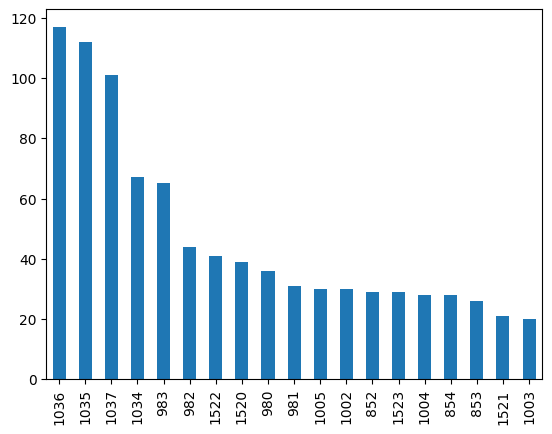

In [56]:
#Gráfico de Barras
df["LojaID"].value_counts(ascending=False).plot.bar()

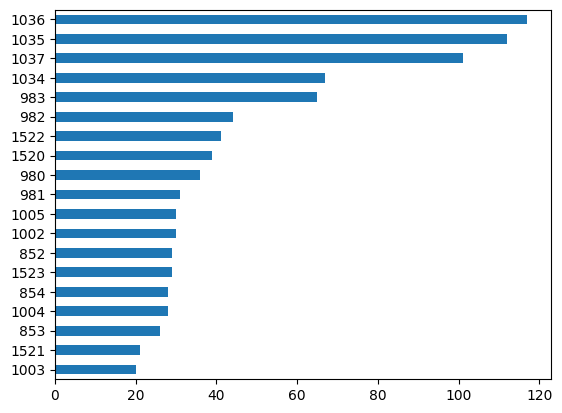

In [57]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();
#Para ocultar a "<matplotlib.axes._subplots.AxesSubplot at 0x7f3d20f73690>", basta utilizar o ";" no final da linha

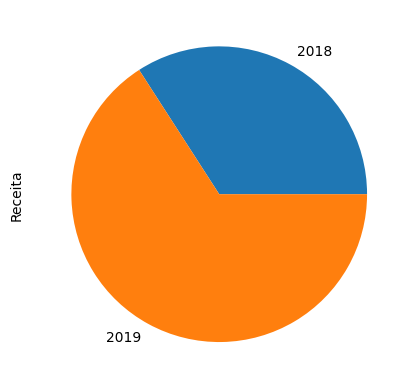

In [58]:
#Gráfico de Pizzas
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [59]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

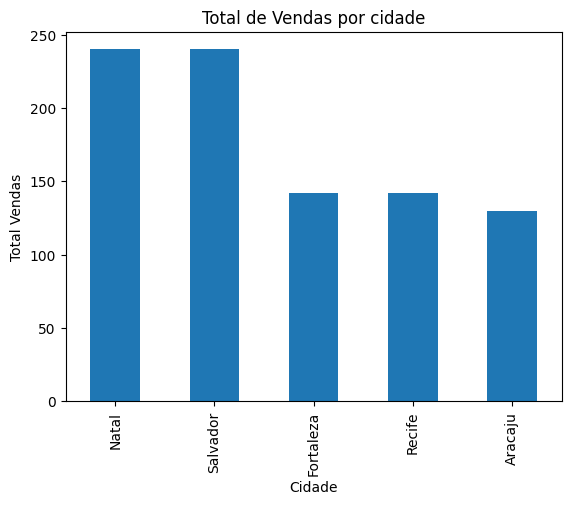

In [60]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

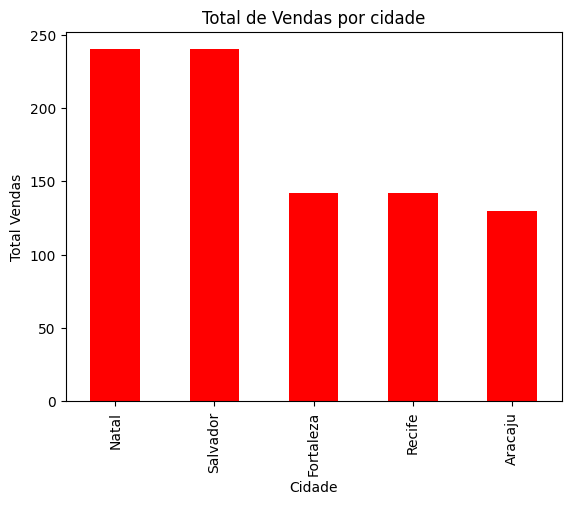

In [61]:
#Aletando a cor
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [62]:
#Alterando o estilo
plt.style.use("ggplot")

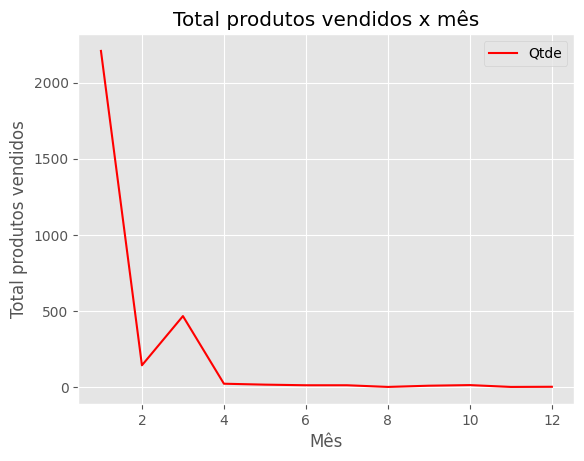

In [63]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total produtos vendidos x mês",color="red")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos");
plt.legend()

In [64]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [65]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_vendas"] == 2019]

In [66]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

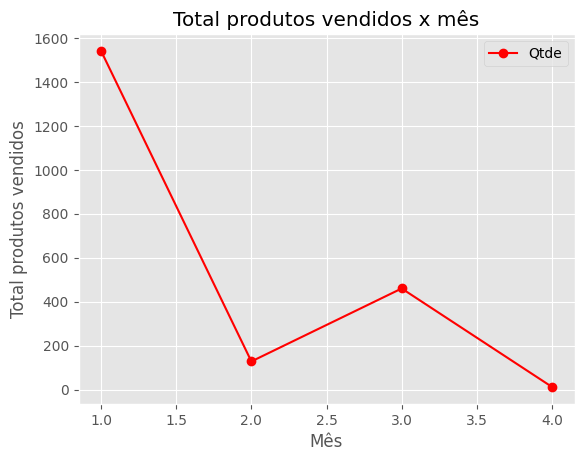

In [67]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="o",title="Total produtos vendidos x mês",color="red")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos");
plt.legend()

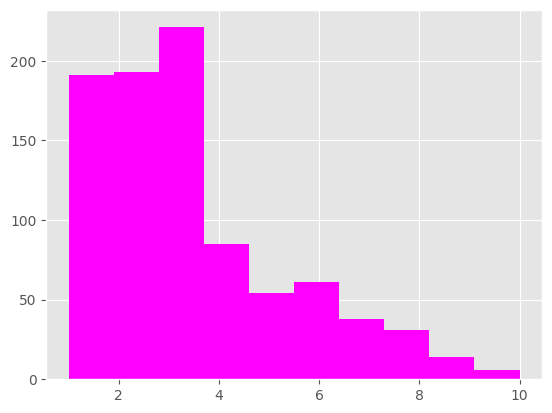

In [68]:
#Histograma
plt.hist(df["Qtde"], color="magenta");

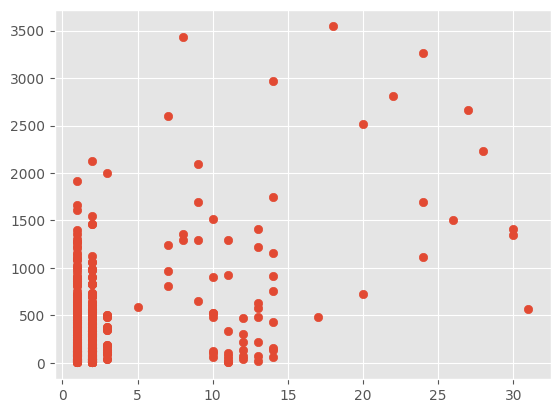

In [69]:
#Gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"])

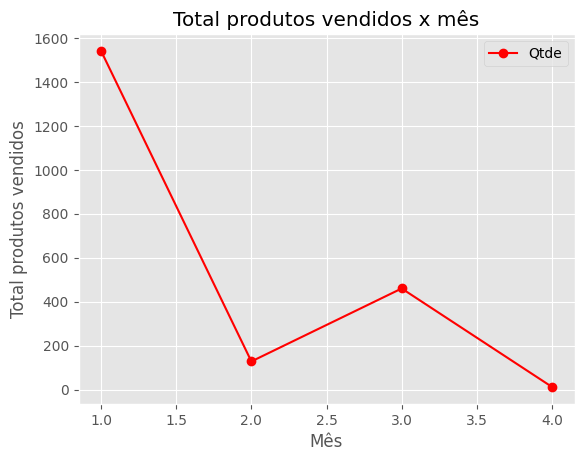

In [70]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="o",title="Total produtos vendidos x mês",color="red")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos");
plt.legend()
plt.savefig("grafico x Qtde produtos.png")